In [1]:
import pandas as pd
import re

In [2]:
dataToPlot = ['applicationTime', 'databaseTime', 'numberOfSellOffers', 'numberOfBuyOffers']
folders = ['10 min', '1h']

In [3]:
hardware = '12_proc_30_ram'

In [ ]:
hardware = '8_proc_20_ram'

In [ ]:
tests = ['2_repliki', '4_repliki', '6_replik', '8_replik', '10_replik']

In [4]:
tests = ['transakcje_60s', 'transakcje_120s', 'transakcje_180s', 'transakcje_240s', 'transakcje_300s']

In [ ]:
tests = ['zapytania_20ms', 'zapytania_100ms', 'zapytania_500ms', 'zapytania_1000ms', 'zapytania_2000ms']

In [ ]:
tests = ['strategia1_100_strategia2_100_strategia3_100', 'strategia1_200_strategia3_100', 'strategia2_200', 'strategia2_200_strategia3_100', 'strategia3_200']

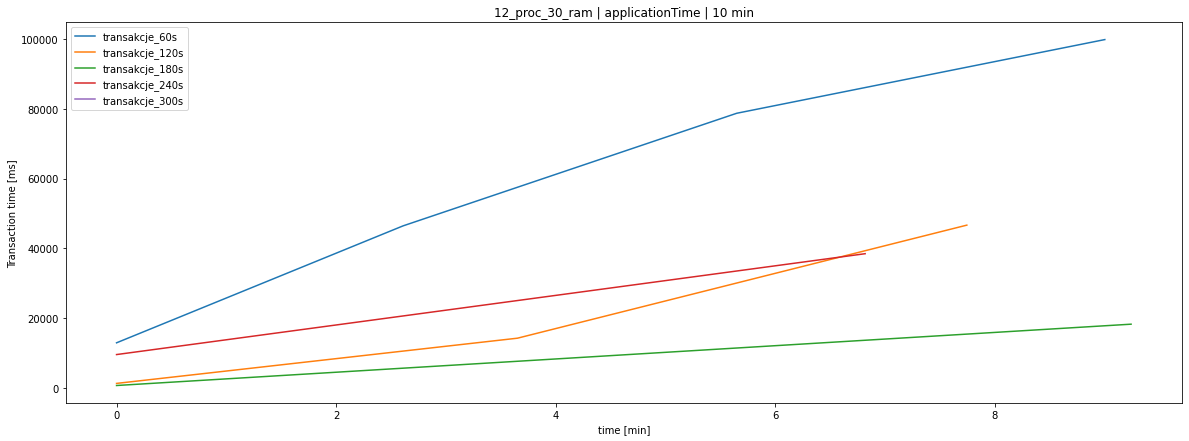

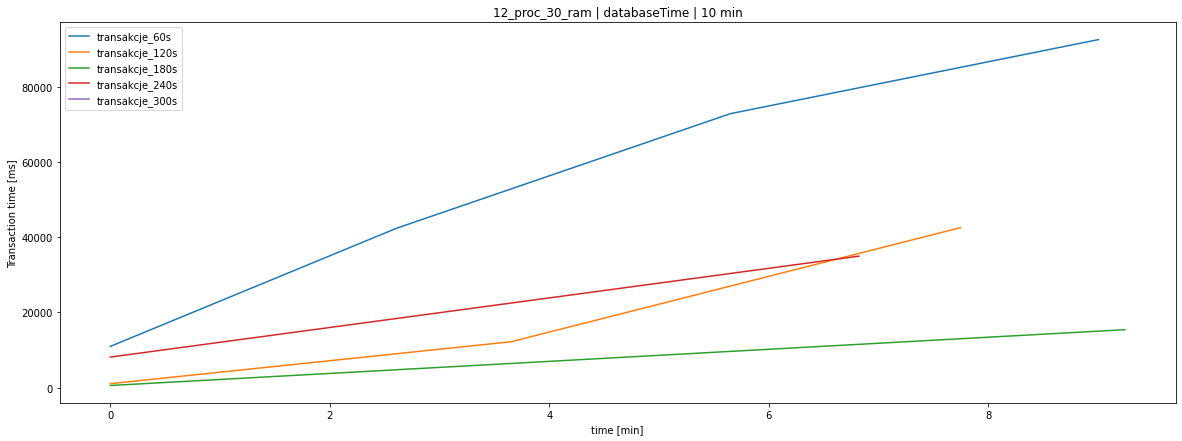

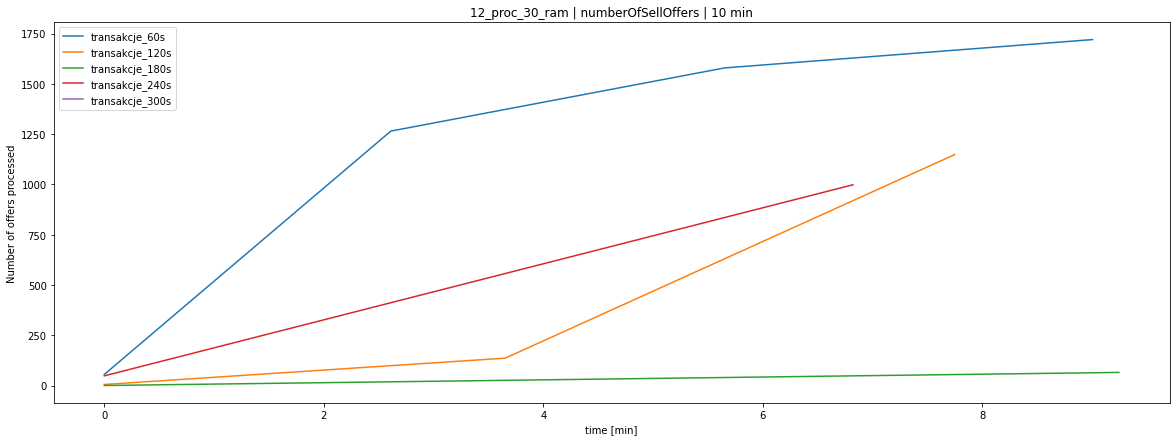

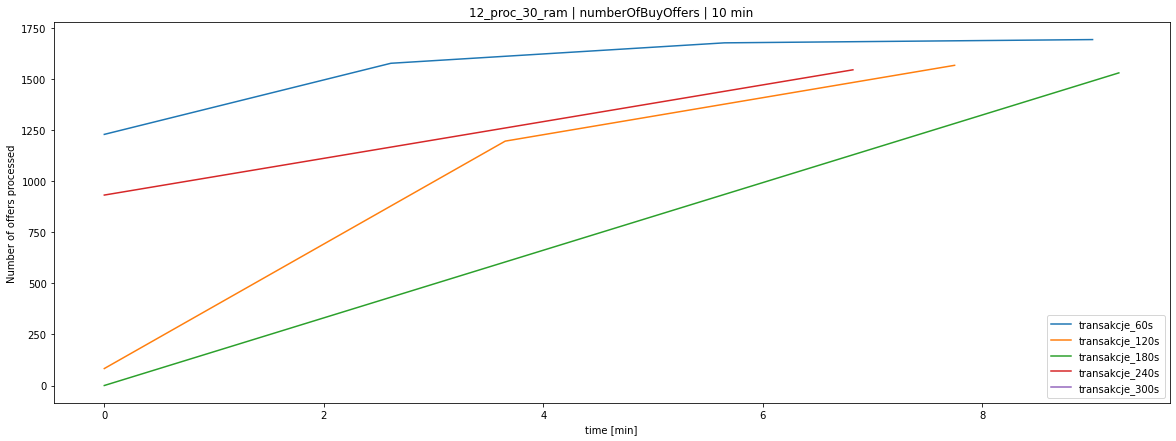

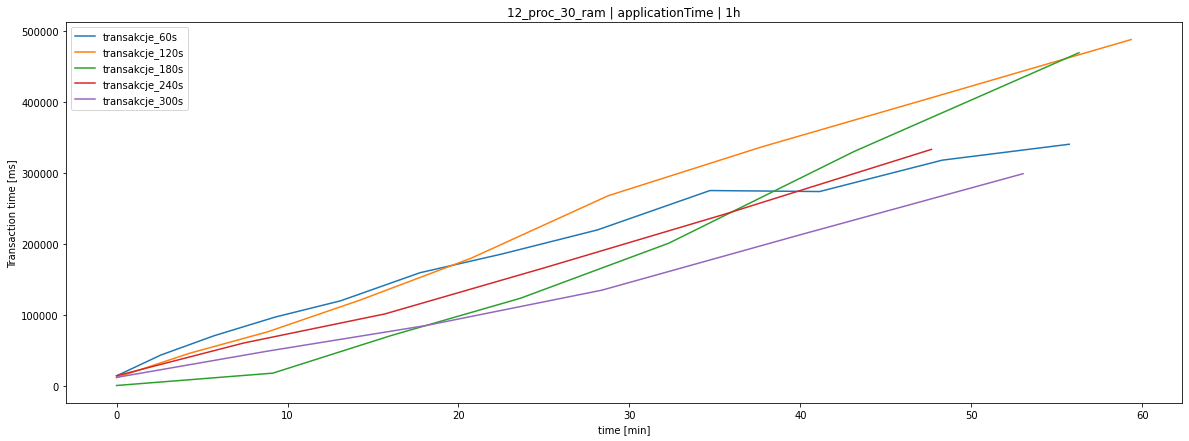

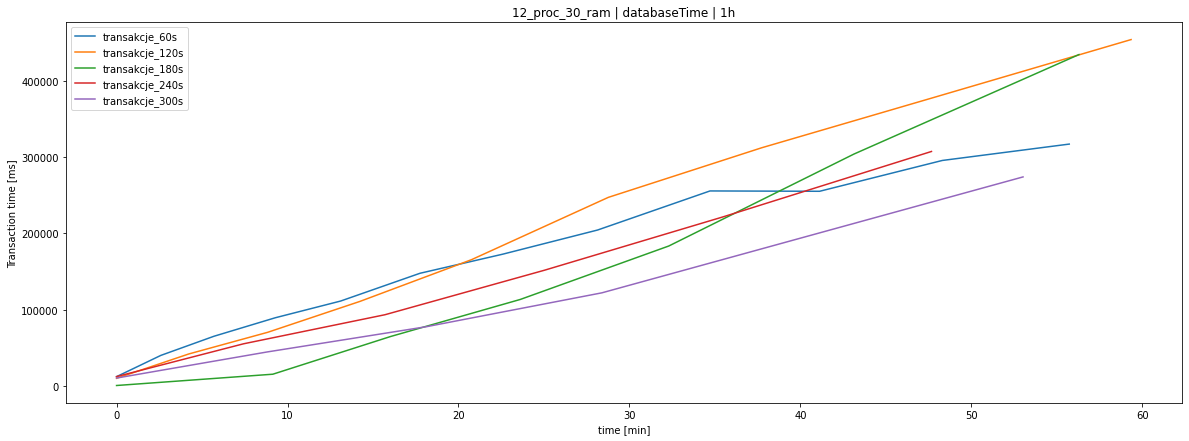

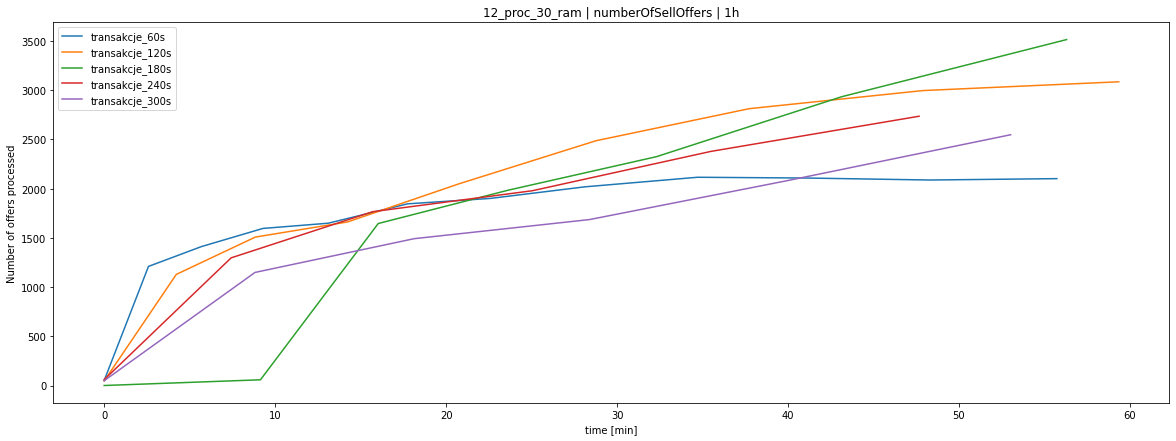

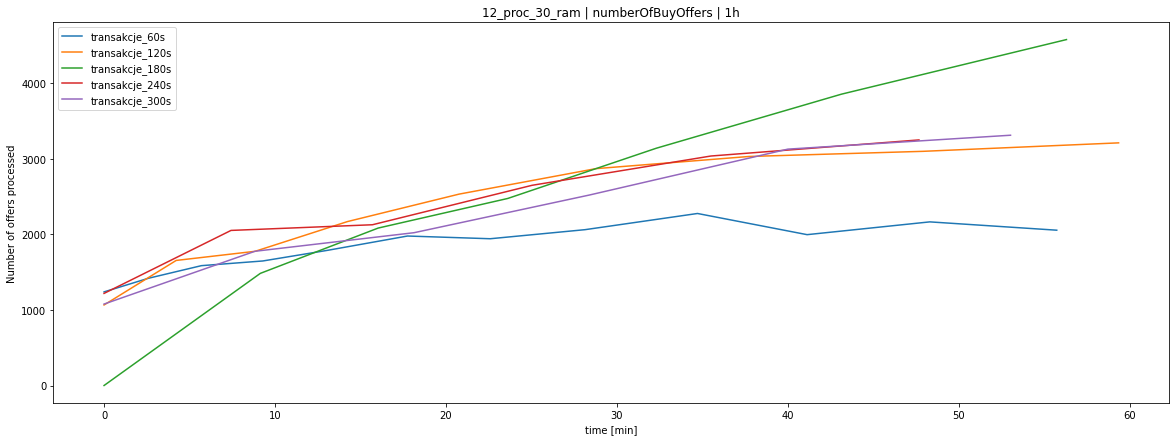

In [5]:
for f in folders:
    for j in dataToPlot:
        data = pd.DataFrame()
        for i in tests:
            try:
                d = pd.read_csv('Testy/' + hardware + '/Testy/' + f + '/' + i + '/trading.csv', usecols=['timestamp', j])
            except:
                continue
            d = d.sort_values(by=['timestamp'])
            t = d['timestamp'][0]
            d['time [min]'] = d['timestamp'].apply(lambda x: (x - t)/60000)

            customDataFrame = pd.DataFrame({'time [min]': d['time [min]'], i: d[j]})
            customDataFrame = customDataFrame.loc[customDataFrame['time [min]'] < 60]
            
            data = pd.concat([data, customDataFrame])
        ax = data.set_index('time [min]').plot(figsize=(20, 7), title = hardware + ' | ' +  j + ' | ' + f)
        ax.set_xlabel("time [min]")
        if re.search("^.*Time$", j):
            ax.set_ylabel("Transaction time [ms]")
        else:
            ax.set_ylabel("Number of offers processed")